In [14]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import darts
import darts.datasets as dds

In [49]:
ticker = (sys.argv[1])
type = (sys.argv[2])

df = pd.read_csv("ETH-USD.csv")


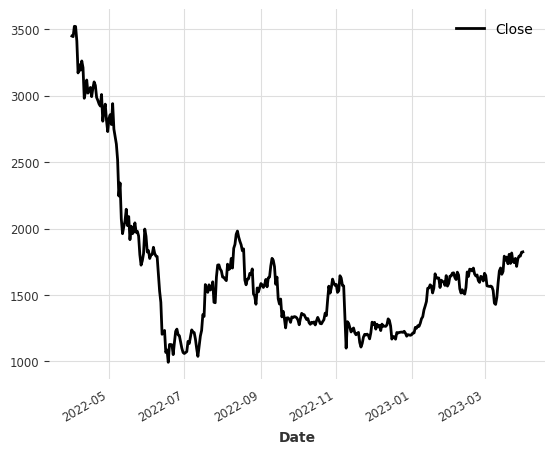

In [50]:
series = darts.TimeSeries.from_dataframe(df,time_col="Date",value_cols="Close")
#series = dds.AirPassengersDataset().load()
#series = darts.TimeSeries.from_csv("BTC-USD.csv")
series.plot()

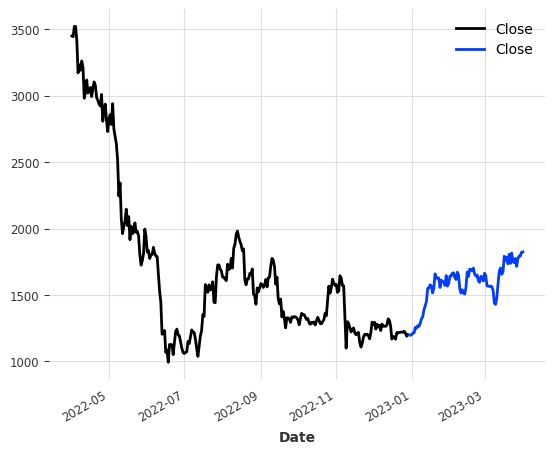

In [51]:
series1, series2 = series.split_before(0.75)
series1.plot()
series2.plot()


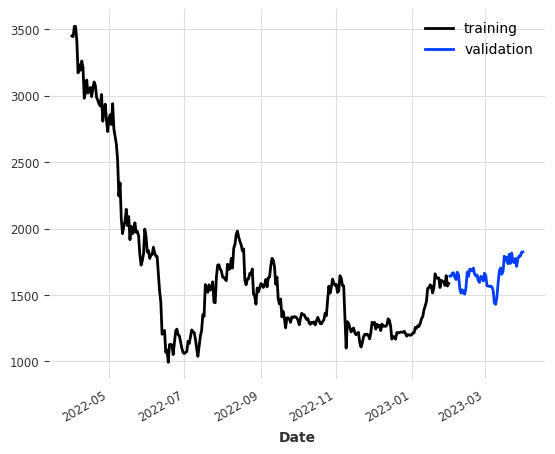

In [52]:
train, val = series.split_before(pd.Timestamp("20230201"))
train.plot(label="training")
val.plot(label="validation")

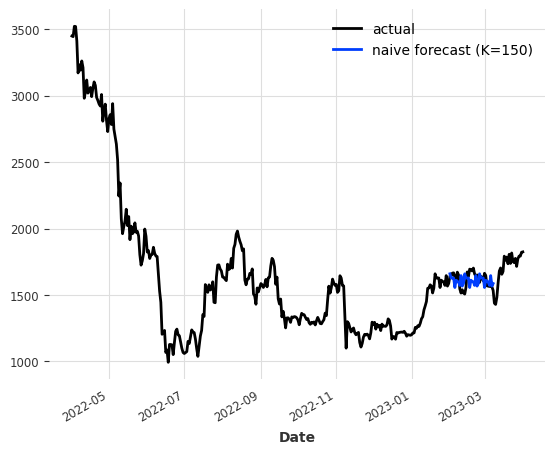

In [53]:
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=12)
naive_model.fit(train)
naive_forecast = naive_model.predict(36)

series.plot(label="actual")
naive_forecast.plot(label="naive forecast (K=150)")

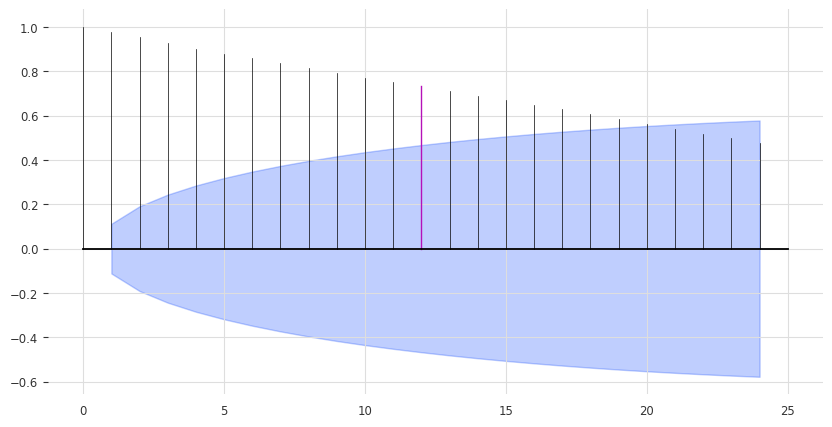

In [54]:
from darts.utils.statistics import plot_acf, check_seasonality

plot_acf(train, m=12, alpha=0.05)

In [55]:
for m in range(2, 25):
    is_seasonal, period = check_seasonality(train, m=m, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

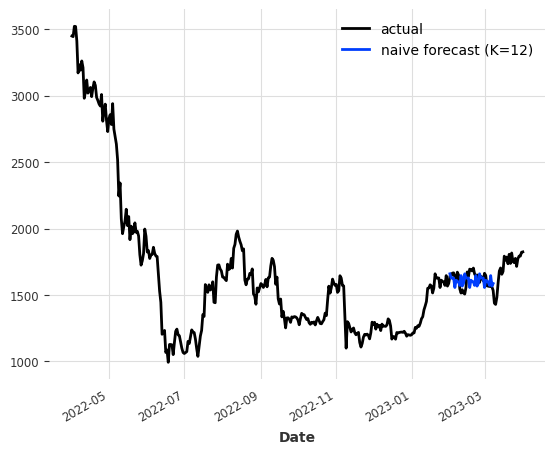

In [59]:
seasonal_model = NaiveSeasonal(K=12)
seasonal_model.fit(train)
seasonal_forecast = seasonal_model.predict(36)

series.plot(label="actual")
seasonal_forecast.plot(label="naive forecast (K=12)")

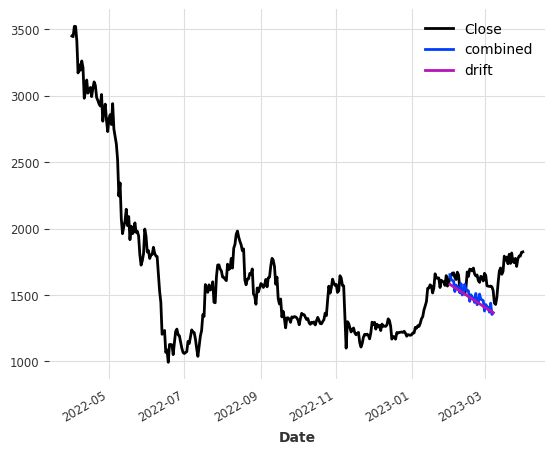

In [57]:
from darts.models import NaiveDrift

drift_model = NaiveDrift()
drift_model.fit(train)
drift_forecast = drift_model.predict(36)

combined_forecast = drift_forecast + seasonal_forecast - train.last_value()

series.plot()
combined_forecast.plot(label="combined")
drift_forecast.plot(label="drift")

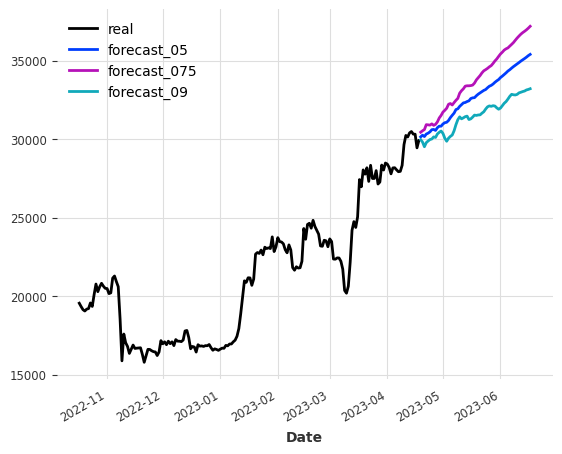

In [44]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import darts
import darts.datasets as dds

ticker = (sys.argv[1])
type = (sys.argv[2])

df = pd.read_csv("BTC-USD.csv")
series = darts.TimeSeries.from_dataframe(df,time_col="Date",value_cols="Close")
#series.plot()
#series1, series2 = series.split_before(0.75)
#series1.plot()
#series2.plot()
_,series_05 = series.split_before(0.5)
_,series_075 = series.split_before(0.75)
_,series_09 = series.split_before(0.9)
from darts.models import ARIMA
model_05 = ARIMA(30,2,0,trend="n")
model_075 = ARIMA(30,2,0,trend="n")
model_09 = ARIMA(30,2,0,trend="n")
model_05.fit(series_05)
model_075.fit(series_075)
model_09.fit(series_09)

forecast_05 = model_05.predict(60)
forecast_075 = model_075.predict(60)
forecast_09 = model_09.predict(60)
series_09.plot(label="real")
forecast_05.plot(label="forecast_05")
forecast_075.plot(label="forecast_075")
forecast_09.plot(label="forecast_09")
#savedata = forecast.pd_dataframe()
#savedata.to_csv(ticker+"-USD forecast.csv")

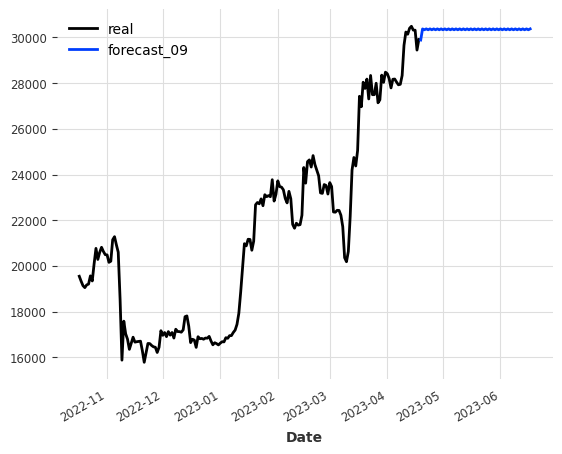

In [50]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import darts
import darts.datasets as dds

ticker = (sys.argv[1])
type = (sys.argv[2])

df = pd.read_csv("BTC-USD.csv")
series = darts.TimeSeries.from_dataframe(df,time_col="Date",value_cols="Close")
#series.plot()
#series1, series2 = series.split_before(0.75)
#series1.plot()
#series2.plot()
_,series_05 = series.split_before(0.5)
_,series_075 = series.split_before(0.75)
_,series_09 = series.split_before(0.9)
from darts.models import CatBoostModel
model_05 = CatBoostModel([-10,-1],output_chunk_length=5)
model_075 = CatBoostModel([-10,-1])
model_09 = CatBoostModel([-10,-1])
model_05.fit(series_05)
model_075.fit(series_075)
model_09.fit(series_09)

forecast_05 = model_05.predict(60)
forecast_075 = model_075.predict(60)
forecast_09 = model_09.predict(60)
series_09.plot(label="real")
#forecast_05.plot(label="forecast_05")
#forecast_075.plot(label="forecast_075")
forecast_09.plot(label="forecast_09")
#savedata = forecast.pd_dataframe()
#savedata.to_csv(ticker+"-USD forecast.csv")